# Homework 5: Eigenvalues & Iterative Methods

In [1]:
import Pkg; Pkg.add("Plots");
using LinearAlgebra; using Plots; default(fmt=:png);
using Printf;
BLAS.set_num_threads(1);
fixedprint(a) = map(x -> @sprintf("%.16f", x), a);

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`


## 1. (T&B Exercise 24.2)

Here is _Gerschgorin's theorem_, which holds for any $m \times m$ matarix $A$, symmetric or nonsymmetric. 

> **Part 1:** Every eigenvalue of $A$ lies in at least one of the $m$ circular disks in the complex plane with centers $a_{ii}$ and radii $\sum_{j\neq i} |a_{ij}|$.

> **Part 2:** Moreover, if $n$ of these disks form a connected domain that is disjoint from the other $m - n$ disks, then there arer precisely $n$ eigenvalues of $A$ with this domain.

### 1.(a) [5%]

Prove the first parat of Gerschgorin's theorem. (Hint: Let $\lambda$ be any eigenvalue of $A$, and $x$ a corresponding eigenvector with largest entry 1.)

Let $x_m = 1$ be the entry in $x$ with largest magnitude: then

$$(A x)_m = \lambda x_m = \lambda.$$

Expanding the left hand side,

$$\lambda = (Ax)_m = a_{m,m} x_m + \sum_{j\neq m} a_{m,j} x_j  = a_{m,m} + \sum_{j \neq m} a_{m,j}.$$

Therefore, by the triangle inequality,

$$
|\lambda - a_{m,m}| = |\sum_{j \neq m} a_{m,j}| \leq \sum_{j\neq m} |a_{m,j}|.
$$

### 1.(b) [5%]

Prove the second part. (Hint: Deform $A$ to a diagonal matrix and use the fact that the eigenvalues of a matrix are continuous functions of its entries.)

Let $A(t) = (1 - t) A + t \ \mathrm{diag}(A)$.  Note that $\mathrm{diag}(A(t)) = \mathrm{diag}(A)$ for each $t$.  For $t=0$, each diagonal entry of $A$ is an eigenvalue: label each eigenvalue $\lambda_i$ by its corresponding diagonal entry $a_{ii}$ in $A(0)$.  The eigenvalues are continuous functions of the entries, so $\lambda_i(t)$ is a continuous curve in the complex plane.

Suppose without loss of generality that the first $n$ disks form a connected domain that is disjoint from the other $m - n$ disks.  If $i \leq n$, then $\lambda_i(1)$ must be in the union of the first $n$ disks, because $\lambda_i(0)$ is. If $\lambda_i(1)$ were not in the union, then there would be some time $\hat{t} < 1$ when $\lambda_i(t)$ is in the union of the $t = 1$ disks but not in the $\hat{t}$ disks.  That would mean at time $\hat{t}$ that $\lambda_i(\hat{t})$ is not in any disk, a contradiction of the first part of Gerschgorin's theorem.  Therefore each $\lambda_i(1)$ is in the union for $1 \leq i \leq n$, and symmetrically $\lambda_i(1)$ is not in the union for $n < i \leq m$.

## 2. (T&B Exercise 27.2)

### 2.(a) [5%]

Let $A \in \mathbb{C}^{m \times m}$ be arbitrary.  The set of all Rayleigh quotients of $A$, corresponding to all nonzero vectors $x \in \mathbb{C}^m$, is known as the _field of values_ or _numerical range_ of $A$, a subset of the complex plane denoted by $W(A)$.

Generate 2 random $3 \times 3$ matrices: one normal, one nonnormal.  Both matrices should have the eigenvalues $\{1, \cos(2\pi/3) + \mathrm{i} \sin(2\pi/3), \cos(4\pi/3) + \mathrm{i} \sin(4\pi/3)\}$.  Create two plots, one for each matrix, that contains a scatter plot of 1000 random Rayleigh quotients.  Each plot should also contain markers for the matrices 3 eigenvalues, using a separate marker style so that they are distinct from the Rayleigh quotients.

In [2]:
### BEGIN SOLUTION
Λ = [1.0, exp(im * 2π / 3), exp(im * 4π / 3)]
Q = qr(randn(Complex{Float64}, 3,3)).Q
X = randn(Complex{Float64}, 3,3)
A_normal = Q * diagm(Λ) * Q'
A_nonnormal = X * (diagm(Λ) / X)
n_samples = 1000
r_normal = zeros(Complex{Float64}, n_samples)
r_nonnormal = copy(r_normal)
for i in 1:n_samples
    x = randn(Complex{Float64}, 3)
    r_normal[i] = (x' * A_normal * x) / (x' * x)
    r_nonnormal[i] = (x' * A_nonnormal * x) / (x' * x)
end
p_normal = plot(real.(r_normal), imag.(r_normal)
    , st = :scatter
    , aspect_ratio = :equal
    , framestyle = :origin
    , legend = false
    , title = "Normal matrix W(A)"
)
plot!(p_normal, real.(Λ), imag.(Λ)
    , st = :scatter
    , m = :square
    )
p_nonnormal = plot(real.(r_nonnormal), imag.(r_nonnormal)
    , st = :scatter
    , aspect_ratio = :equal
    , framestyle = :origin
    , legend = false
    , title = "Nonnormal matrix W(A)"
)
plot!(p_nonnormal, real.(Λ), imag.(Λ)
    , st = :scatter
    , m = :square
    )
plot(p_normal, p_nonnormal, layout=(1,2))
### END SOLUTION

### 2.(b) [5%]

Your plots should show that in both the normal and nonnormal case the convex hull of the eigenvalues is contained in $W(A)$.  Prove that if $A$ is normal then $W(A)$ is contained in the the convex hull of the eigenvalues of $A$, i.e. they are equal..

If $A$ is normal then it has a complete unitary eigenbasis $Q$.  Let a unit vector $w$ be given:

$$
r(w) = w^* A w = w^* Q \mathrm{diag}(\Lambda) Q^* w 
= \tilde{w}^* \mathrm{diag}(\Lambda) \tilde{w} = \sum_i |\tilde{w}_i|^2 \lambda_i.
$$

But $\tilde{w} = Qw$ is also a unit vector, so $\sum_i |\tilde{w}_i|^2 = 1$, which shows that $r(w)$ is a convex combination of the eigenvalues.

## 3. (T&B Exercise 27.3)

### 3.(a) [10%]

Show that for a nonhermitian matrix $A \in \mathbb{C}^{m \times m}$, the Rayleigh quotient $r(x)$ gives an eigenvalue estimate that is generally linear, not quadratic.  Explain what convergence rate this suggests for the Rayleigh quotient iteration applied to nonhermitian matrices.

Hint: given a unit eigenvector $v_j$, consider $v(t) = v_j + t \delta v$ for real $t$ and $\delta v$ an arbitrary vector and consider $\partial_t r(v(t))$ at $t = 0$.

Following the hint,

$$\partial_t r(v(t)) =
- \frac{v(t)^* A v(t)}{(v(t)^* v(t))^2}(\delta v^* v(t) + v(t)^* \delta v)
+
\frac{\delta v^* A v(t) + v(t)^* A \delta v}{v(t)^* v(t)}.
$$

Plugging in $t = 0$, we get

$$\partial_t r(v_j) =
- \frac{v_j^* v_j \lambda_j}{(v_j^* v_j)^2}(\delta v^* v_j + v_j^* \delta v)
+
\frac{\delta v^* v_j \lambda_j + v_j^* A \delta v}{v_j^* v_j}
=
- \lambda_j(\delta v^* v_j + v_j^* \delta v)
+
(\delta v^* v_j \lambda_j + v_j^* A \delta v)
=
v_j^*(A - \lambda_j I)\delta v.
$$

In this case $v_j$ is not necessarily a left eigenvector so this is not identically zero.

Therefore the linear terms are present in the Taylor expansion around $v_j$, and

$$r(x) - r(v_j) = O(\|x - v_j\|)\quad \text{ as }x \to v_j.$$

If $\lambda_j$ is simple, suppse as in the proof of T&B Theorem 27.3 that $\|v^{(k)} - v_j\| \leq \epsilon$.
Then computing the Rayleigh quotient gives us $|\lambda^{(k)} - v_j| = |r(v^{(k)}) - r(v_j)| = O(\epsilon).$
Then after one step of inverse iteration $\|v^{(k+1)} - v_j\| = O(|\lambda^{(k)} - \lambda_j|\|v^{(k)} - v_j\|) = O(\epsilon^2).$

### 3.(b) [5%]

Implement the Rayleigh quotient iteration and test it on a random complex nonhermitian matrix  of size $m=100$.  At each iteration log
the size of the update, $d_k = |\lambda^{(k+1)} - \lambda^{(k)}|$.  If the eigenvalue estimates are converging, then $d_k$ should converge to 0 with the same convergence rate predicted by part (a).  Display the vector of $d_k$ values using the `fixedprint` command: before machine precision is reached, you should see the number of zeros in $d_k$ increasing at a predictable rate. 

In [3]:
m = 100
A = randn(Complex{Float64}, m, m)
### BEGIN SOLUTION
v = randn(Complex{Float64}, m)
λ = A[1,1]
n_iter = 10
ds = Float64[]
for i in 1:n_iter
    v = (A - I * λ) \ v
    v /= norm(v)
    λ_prev = λ
    λ = v' * A * v
    append!(ds, norm(λ - λ_prev))
end
fixedprint(ds)
### END SOLUTION

10-element Vector{String}:
 "0.1751959068679767"
 "0.5386215091492513"
 "0.3853127900129283"
 "0.1333756928874492"
 "0.0113257217769363"
 "0.0001195798063564"
 "0.0000000089530198"
 "0.0000000000000148"
 "0.0000000000000075"
 "0.0000000000000010"

## 4. (T&B Exercise 31.3) [5%]

Show that if the entries on both principle diagonals of a bidiagonal matrix are all nonzero, then the singular values of the matrix are distinct.  (Hint: you may use the claims of previous exercises in the book without proof.)

Use the result of T&B Exercise 25.1(a), which says that if the offdiagonal entries of a symmetric tridiagonal matrix are all nonzero, then the eigenvalues are distinct.

Let $A$ be the bidiagonal matrix with nonzeros on the principle diagonals, and let $B = A^* A$.

The nonzero structure of $B$ is that $b_{ij} = \sum_k \bar{a}_{ki} a_{kj}$ must be zero if there is no $k$ such that $i-1\leq k \leq i$ and $j-1 \leq k \leq j$, which is the case if $|i - j| > 1$.  Therefore $B$ is
tridiagonal, and if we inspect an off-diagonal entry on the first subdiagonal,

$$b_{i,i-1} = \bar{a}_{i-1,i} a_{i-1,i-1} \neq 0.$$

Therefore by 25.1(a), the eigenvalues of $B$ are distinct, but the eigenvalues of $B$ are the squares of the singular values of $A$.  Therefore the singular values of $A$ are distinct.

## 5. (T&B Exercise 35.6)

### 5.(a) [10%]

Implement the Arnoldi iteration by modifeid Gram-Schmidt as described by T&B Algorithm 33.1.

In [4]:
function arnoldi(A, b, n)
    """
    Compute the result of n Arnoldi iterations applied to the matrix A, with b
    as the initial vector of the Krylov subspaces.  Use the modified Gram-Schmidt
    process to generate the orthonormal basis of the Krylov subspace
    
    # Arguments
    
    - A: an m × m matrix
    - b: an m vector
    - n: the number of Arnoldi iterations
    
    # Returns:
    
    - Q: an m × (n+1) matrix of column vectors that are orthonormal
    - H: an (n+1) × n upper Hessenberg matrix such that
    
        A * Q[:,1:n] = Q[:,1:n+1] * H
    """
    m = size(A)[1]
    ### BEGIN SOLUTION
    Q = zeros(eltype(A), m, n+1)
    H = zeros(eltype(A), n+1, n)
    Q[:,1] = b / norm(b)
    for k in 1:n
        # compute the next direction in the Krylov subspace
        v =  A * Q[:,k]
        # project out the previous components by modified Gram-Schmidt
        for j in 1:k
            H[j,k] = Q[:,j]' * v
            v -= H[j,k] * Q[:,j]
        end
        # normalize
        H[k+1,k] = norm(v)
        Q[:,k+1] = v / norm(v)
    end
    ### END SOLUTION
    return Q, H
end

arnoldi (generic function with 1 method)

In [5]:
# Q5.a: random inputs and outputs

m = 50
n = 25
A = randn(m, m)
b = randn(m)
Q, H = arnoldi(A, b, n);

In [6]:
# Q5.a: the first vector of Q is the normalized b vector
@assert(norm(Q[:,1] - b / norm(b)) ≤ 10 * m * eps())

In [7]:
# Q5.a: columns of Q are orthnormal
@assert(norm(I - Q' * Q) ≤ 10 * m * m * eps())

In [8]:
# Q5.a: H is upper Hessenberg
@assert(norm(H - UpperHessenberg(H)) == 0.0)

In [9]:
# Q5.a: reconstruction errror
@assert(norm(A * Q[:,1:n] - Q * H) ≤ 10 * m * eps())

### 5.(b) [6%]

Implement a simplified version of GMRES that returns the solution $x_n$ after a fixed number of $n$ iterates.  In this version, $x_k$ does not have to be computed for each $k$: run an Arnoldi iteration for $n$ iteration and then solve the minimum residual equations for $x_n$.

In [10]:
function gmres(A, b, n)
    """
    Compute the approximate solution to Ax = b by doing n iterations of GMRES.
    Do not compute the approximate solution for iterations less than n.
    Use arnoldi to generate and then solve the least squares problem
    
    
    # Arguments
    
    - A: an m × m matrix
    - b: an m vector
    - n: the number of Arnoldi iterations
    
    # Returns:
    
    - x: the approximate solution in the krylov subspace Kₙ that minimizes the residual
    
        || Ax - b ||
    """
    ### BEGIN SOLUTION
    m = size(A)[1]
    Q, H = arnoldi(A, b, n)
    e₁ = [[one(eltype(A))]; zeros(eltype(A), n)]
    y = H \ e₁ * norm(b)
    x = Q[:,1:n] * y
    ### END SOLUTION
    return x
end

gmres (generic function with 1 method)

In [11]:
# Q5.b: Generate a random problem

m = 50
n = 25

A = randn(m,m)
b = randn(m)
x = gmres(A, b, n);

In [12]:
# Q5.b: x is in the correct Krylov subspace
Q, H = arnoldi(A, b, m-1)
Q̃ = Q[:,1:n]
@assert(norm(x - Q̃ * (Q̃' * x)) / norm(x) ≤ 10 * m * eps())

In [13]:
# Q5.b: the residual is orthogonal to the remaining directions

r = b - A * x
@assert(norm(Q[:,n+2:m]' * (b - A * x)) / norm(r) ≤ 10 * m * eps())

### 5.(c) [4%]

For larger values of $n$, the cost of GMRES in operations and storage may be prohibitive.  In such circumstances a method called _$k$-step restarted GMRES_ or _GMRES($k$)_ is often employed, in which, after $k$-steps, the GMRES iteration is started anew with the current vector $x_k$ as an initial guess.

In [14]:
function gmres_k(A, b, k, n_outer)
    """Compute an approximate solution to A*x = b by n_outer iterations of GMRES(k)"""
    x = zeros(eltype(A), size(A)[1])
    for i in 1:n_outer
        r = b - A * x
        if norm(r) == 0.0
            return x
        end
        x += gmres(A, r, k)
    end
    return x
end

gmres_k (generic function with 1 method)

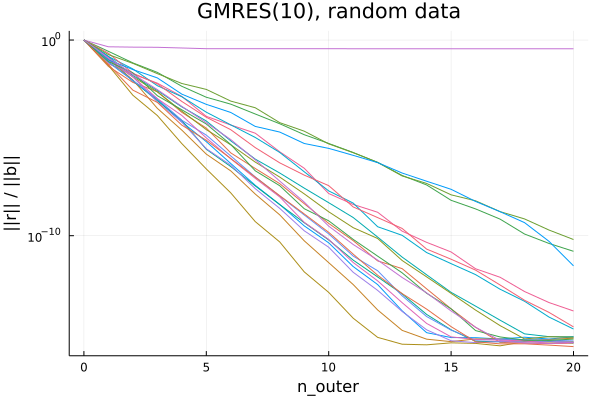

In [15]:
m = 50
k = 10
p = plot(title="GMRES($k), random data", yscale=:log10, legend=false, xlabel="n_outer", ylabel="||r|| / ||b||")
n_outers = 0:20
n_trials = 20
for i in 1:n_trials
    A = I + 0.9 * randn(m,m) / sqrt(m)
    b = randn(m)
    rs = [ norm(b - A * gmres_k(A, b, k, n)) / norm(b) for n in n_outers]
    plot!(p, n_outers, rs)
end
p

For a given $k$, construct example data $A$ and $b$ for which GMRES($k$) does not converge but GMRES($k+1$) converges in $1$ outer iteration.

In [16]:
function gmres_k_bad(m, k)
    """
    Construct an m × m matrix A and rhs b such that GMRES(k) does not converge
    but GMRES(k+1) converges in one iteration
    """
    ### BEGIN SOLUTION
    A = Matrix(I*1.0,m,m)
    A[2:k+1,1:k] = Matrix(I*1.0,k,k)
    A[1,k+1] = 1.0
    A[k+1,k+1] = 0.0
    b = zeros(m)
    b[1] = 1
    ### END SOLUTION
    return A, b
end

gmres_k_bad (generic function with 1 method)

In [ ]:
m = 50
k = 10
p = plot(title="GMRES($k) and GMRES($(k+1)), bad matrix", yscale=:log10, xlabel="n_outer", ylabel="||r|| / ||b||")
n_outer = 1:20
A, b = gmres_k_bad(m, k)
rs_k = [ norm(b - A * gmres_k(A, b, k, n)) / norm(b) for n in n_outers ]
@assert( all(rs_k .> 0.5))
rs_kp = [ norm(b - A * gmres_k(A, b, k+1, n)) / norm(b) for n in n_outers ]
@assert( all(rs_kp[2:end] .< 10.0 * eps()))

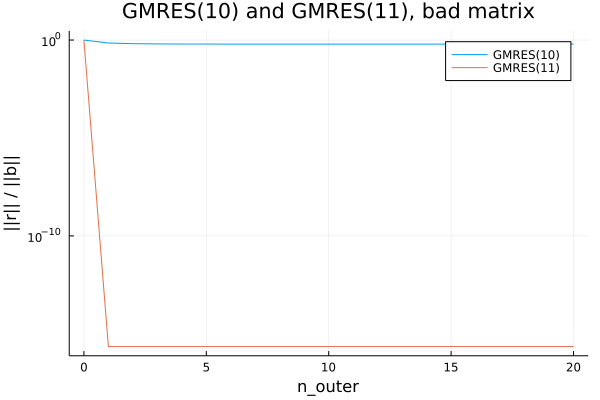

In [17]:
plot!(p, n_outers, max.(rs_k, eps()), label="GMRES($k)")
plot!(p, n_outers, max.(rs_kp, eps()), label="GMRES($(k+1))")

## 6. (T&B Exercise 33.3)

### 6.(a) [5%]

Suppose `arnoldi` is executed for a particular $A$ and $b$ and runs to completion ($m=n$) with no breakdown where $h_{k+1,k} = 0$ for $k < m$.  Show that this implies that the minimal polynomial of $A$ is of degree $m$.

The solution from GMRES, $\min_{x \in \mathcal{K}_n(A,b)}\ \|Ax - b\|$, is equivalent to $\min_{p \in \mathcal{P}_n: p(0) = 1} \|p(A)b\|$.  When $h_{k+1,k} \neq 0$ it implies that the true solution to $Ax = b$ is not in
$\mathcal{K}_k(A,b)$, and thus $0 < \min_{p \in \mathcal{P}_k: p(0) = 1}\ \|p(A)b\|$, which implies that the minimal polynomial of $A$ has degree greater than $k$.  Therefore if $h_{k+1,k} \neq 0$ for all $k < m$, the minimal polynomial has degree $m$.

### 6.(b) [5%]

Conversely, suppose that the minimal polynomial of $A$ is of degree $m$.  Show that this does not imply that for a particular choice of $b$, `arnoldi` will necessarily run to completion without a breakdown.

Every matrix has at least one nonzero eigenvector, $Av = \lambda v$, which means that $K_k(A,v) = \mathrm{span}\{v\}$ for every $k$, so $h_{2,1} = 0$ for the Arnoldi process starting with $v$ as the right hand side.

### 6.(c) [5%]

A previous exercise (T&B Exercise 25.1(b)) stated that there exist upper Hessenberg matrices whose subdiagonal entries are all nonzero that also have repeated eigenvalues.  Let $H$ be just such an upper Hessenberg matrix.  Why does $H$ not express a contradiction between exercise 25.1(b) and part (a) of this question?

Because there exist matrices with repeated eigenvalues that still have a minimal polynomial of degree $m$.  These matrices are necessarily defective matrices.

## 7. (T&B Exercise 35.3)

The recurrence $x_{n+1} = x_n + \alpha r_n = x_n + \alpha(b - Ax_n)$, where $\alpha$ is a scalar constant, is known as a _Richardson iteration._

### 7.(a) [5%]

What polynomial $p(A)$ at step $n$ does this correspond to?

Let $Ax = b$ and let $e_n = x_n - x$, so $x_n = e_n + x$.  Then
$$x_{n+1} = e_{n+1} + x = e_{n} + x + \alpha(b - A(e_{n} + x)) = e_n + x - \alpha A e_n.$$

In other words,
$$e_{n+1} = e_n - \alpha A e_n = (I - \alpha A) e_n.$$

Therefore $e_n = (I - \alpha A)^n e_0,$ so $p(A) = (I - \alpha A)^n$.

### 7.(b) [5%]

Suppose $A$ has real eigenvalues in $[\lambda_{\min}, \lambda_{\max}]$ where $0 < \lambda_\min \leq \lambda_\max$: other then $\lambda_{\min}$ and $\lambda_{\max}$, you do not know the other eigenvalues.

What choice of $\alpha$ has the best convergence factor and what is it?  Explain your answer.

The optimal $\alpha$ will minimize the maximum absolute value of $p(x)$ on the interval $x\in [\lambda_\min,\lambda_\max]$, which is also the value of $\alpha$ that minimizes the maximum absolute value of $(1 - \alpha x)$ on the interval.  This is linear, so the maximum absolute value will be at one of the endpoints, we are trying to minimize

$$\max\{|1 - \alpha \lambda_\min|, |1 - \alpha \lambda_\max| \}.$$

This is minimized by choosing $\alpha = {2} / (\lambda_\min + \lambda_\max),$ at which point the convergence rate will be

$$
|1 - \alpha \lambda_\min| = \frac{\lambda_{\max} - \lambda_{\min}}{\lambda_{\min} + \lambda_\max}.
$$

## 8. (T&B Exercises 38.4)

### 8.(a) [10%]

Write functions that estimate the number of flops it takes to solves $Ax = b$ to a relative tolerance of $\epsilon$ when $A$ is an $m \times m$
symmetric positive definite matrix with condition number $\kappa$.

When counting the flops, it is important to get the correct polynomial order as a function of $m$.  For full points the number of flops in a factorization or matrix-vector product should also have the correct leading coefficient.

When estimating the number of iterations in an iterative method, the correct convergence rate predicted by the theory must be used.

For the Richardson iteration, use the convergence rate corresponding to the optimal choice of $\alpha$.

In [18]:
function cholesky_flops(m)
    # estimate of the flops to solve Ax = b by Cholesky factorization if A is a dense m × m matrix
    ### BEGIN SOLUTION
    return (1/3) * m^3
    ### END SOLUTION
end

cholesky_flops (generic function with 1 method)

In [19]:
function richardson_flops(m, κ, ϵ)
    # estimate of the flops to solve Ax = b by Richardson iteration to a relative tolerance of ϵ
    # if A is dense m × m and κ(A) = κ
    ### BEGIN SOLUTION
    n_iter = Int64(round(log(ϵ) / log(1 - 1 / κ)))
    return n_iter * 2 * m^2
    ### END SOLUTION
end

richardson_flops (generic function with 1 method)

In [20]:
function conjugate_gradient_flops(m, κ, ϵ)
    # estimate of the flops to solve Ax = b by conjugate gradient iteration to a relative tolerance of ϵ
    # in the A norm error if A is dense m × m and κ(A) = κ
    ### BEGIN SOLUTION
    sk = √κ
    f = (sk - 1) / (sk + 1)
    n_iter = Int64(round(log(ϵ / 2) / log(f)))
    return n_iter * 2 * m^2
    ### END SOLUTION
end

conjugate_gradient_flops (generic function with 1 method)

### 8.(b) [5%]

Create a plot of the required flops to solve $Ax = b$ to a relative tolerance $\epsilon = 10^{-10}$
when $\kappa = 100$ for values of $m$ between 10 and 1 million.  Your plot should be well labeled and
use appropriate scales for the two axes.

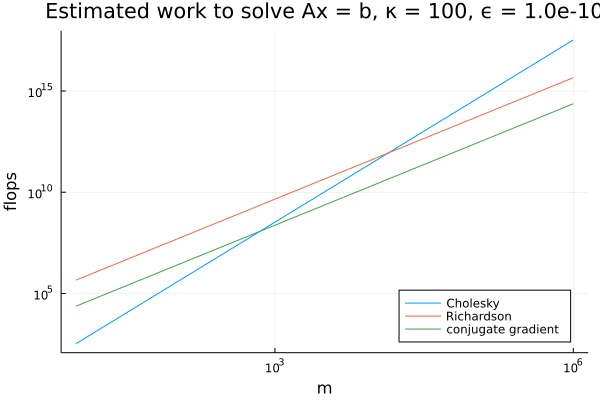

In [21]:
### BEGIN SOLUTION
κ = 100
ϵ = 1.e-10
ms = Int64.(round.(10 .^ LinRange(1,6,20)))
flops_cholesky = map(m -> cholesky_flops(m), ms)
flops_richardson = map(m -> richardson_flops(m, κ, ϵ), ms)
flops_cg = map(m -> conjugate_gradient_flops(m, κ, ϵ), ms)
plot(ms, [flops_cholesky flops_richardson flops_cg]
    , label=["Cholesky" "Richardson" "conjugate gradient"]
    , xlabel="m"
    , ylabel="flops"
    , title="Estimated work to solve Ax = b, κ = $κ, ϵ = $ϵ"
    , legend=:bottomright
    , scale=:log10)
### END SOLUTION